## Начало 4-й лабораторной
####  Ближайшие объекты к Земле

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config

set_config(transform_output="pandas")
df = pd.read_csv(".//static//csv//neo.csv")
print(df.columns)
df

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
0           13569.249224   5.483974e+07         Earth          False   
1           73588.726663   6.143813e+07         Earth          False   
2          114258.692129   4.979872e+07         Earth          False   
3           24764.303138   2.543497e+07         Earth          False   
4           42737.733765   4.627557e+07         Earth          False   
...                  ...            ...           ...            ...   
90831       52078.886692   1.230039e+07         Earth          False   
90832       46114.605073   5.432121e+07         Earth          False   
90833        7566.807732   2.840077e+07         Earth          False   
90834       69199.154484   6.869206e+07         Earth          False   
90835       27024.455553   5.977213e+07         Earth          False   

       absolute_magnitude  hazardous  
0                   16.73      False  
1                   20.00       True  
2                   17.83      False  
3                   22.20      False  
4                   20.09       True  
...                   ...        ...  
90831               25.00      False  
90832               26.00      False  
90833               24.60      False  
90834               27.80      False  
90835               24.12      False  

[90836 rows x 10 columns]

### Бизнес-цели:

1. Идентификация потенциально опасных объектов

Описание: классифицировать астероиды как потенциально опасные или безопасные (используя целевой признак "hazardous"). Эта задача актуальна для оценки рисков и подготовки соответствующих действий по защите Земли.

2. Прогнозирование минимального расстояния до Земли

Описание: предсказать минимальное расстояние до Земли для новых объектов на основе характеристик астероида (скорости, размера и других параметров). Это позволит планировать исследования и наблюдения в зависимости от опасности.  

### Определение достижимого уровня качества модели для первой задачи 

#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи классификации

Целевой признак -- hazardous

In [16]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

# Устанавливаем случайное состояние
random_state = 42

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.
    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="hazardous", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

id         name  est_diameter_min  est_diameter_max  \
2639    3634614  (2013 GT66)          0.024241          0.054205   
29138  54143560   (2021 JU1)          0.030238          0.067615   
36927   3836085   (2018 VQ3)          0.201630          0.450858   
61855   3769804  (2017 DJ34)          0.160160          0.358129   
15916   3824978    (2018 KS)          0.006991          0.015633   
...         ...          ...               ...               ...   
29491   3827304   (2018 RR1)          0.002658          0.005943   
18373   3735468   (2015 WY1)          0.103408          0.231228   
25031   3802041   (2018 FE3)          0.009651          0.021579   
35456   3430406  (2008 TR10)          0.221083          0.494356   
14305   3285300   (2005 OG3)          0.298233          0.666868   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
2639        43303.999094   4.814117e+07         Earth          False   
29138       21770.790211   5.646643e+07         Earth          False   
36927      109358.123029   6.435051e+07         Earth          False   
61855       78494.609756   5.595780e+07         Earth          False   
15916       19077.749486   3.834648e+07         Earth          False   
...                  ...            ...           ...            ...   
29491       19826.895880   3.852881e+07         Earth          False   
18373       82856.544926   7.314334e+07         Earth          False   
25031       34243.774201   4.257719e+07         Earth          False   
35456       19557.289783   2.152970e+07         Earth          False   
14305       20309.404706   1.770015e+07         Earth          False   

       absolute_magnitude  hazardous  
2639                25.20      False  
29138               24.72      False  
36927               20.60      False  
61855               21.10      False  
15916               27.90      False  
...                   ...        ...  
29491               30.00      False  
18373               22.05      False  
25031               27.20      False  
35456               20.40      False  
14305               19.75      False  

[72668 rows x 10 columns]

'y_train'

hazardous
2639       False
29138      False
36927      False
61855      False
15916      False
...          ...
29491      False
18373      False
25031      False
35456      False
14305      False

[72668 rows x 1 columns]

'X_test'

id               name  est_diameter_min  est_diameter_max  \
9040    2474532  474532 (2003 VG1)          0.472667          1.056915   
67305   3774018         (2017 HF1)          0.084053          0.187949   
77741  54269585         (2022 GQ2)          0.018220          0.040742   
81520  54097970          (2020 XS)          0.152952          0.342011   
508     3730802       (2015 TT238)          0.031956          0.071456   
...         ...                ...               ...               ...   
28261   3532365         (2010 MH1)          0.139494          0.311918   
1159   54073345          (2020 UE)          0.020728          0.046349   
48095   3836195         (2018 VT7)          0.006991          0.015633   
90234   3752902        (2016 JG12)          0.084053          0.187949   
12013   3445077        (2009 BM58)          0.038420          0.085909   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
9040        21779.237137   3.443050e+07         Earth          False   
67305       53291.016226   6.862591e+07         Earth          False   
77741       43089.046433   2.592726e+07         Earth          False   
81520       93246.455599   4.709054e+07         Earth          False   
508         37708.258544   4.232149e+07         Earth          False   
...                  ...            ...           ...            ...   
28261       37604.980238   7.369507e+07         Earth          False   
1159        36720.077728   3.366114e+07         Earth          False   
48095        7616.496535   6.376350e+06         Earth          False   
90234       21894.554692   5.736984e+07         Earth          False   
12013       49828.611609   4.305599e+07         Earth          False   

       absolute_magnitude  hazardous  
9040                18.75      False  
67305               22.50      False  
77741               25.82      False  
81520               21.20      False  
508                 24.60      False  
...                   ...        ...  
28261               21.40      False  
1159                25.54      False  
48095               27.90      False  
90234               22.50      False  
12013               24.20      False  

[18168 rows x 10 columns]

'y_test'

hazardous
9040       False
67305      False
77741      False
81520      False
508        False
...          ...
28261      False
1159       False
48095      False
90234      False
12013      False

[18168 rows x 1 columns]

#### Формирование конвейера для классификации данных
preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

pipeline_end -- основной конвейер предобработки данных и конструирования признаков

In [21]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor  # Пример регрессионной модели
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

class StarbucksFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Преобразование категориальных столбцов в числовые 1/0
        X["hazardous"] = X["hazardous"].astype(int)
        X["sentry_object"] = X["sentry_object"].astype(int)
        X["Length_to_Width_Ratio"] = X["x"] / X["y"]
        return X

    def get_feature_names_out(self, features_in):
        return np.append(features_in, ["Length_to_Width_Ratio"], axis=0)

# Указываем столбцы, которые нужно удалить и обрабатывать
columns_to_drop = ["name", "orbiting_body"]
num_columns = ["est_diameter_min", "est_diameter_max",
  "relative_velocity", "miss_distance", "sentry_object",
  "absolute_magnitude", "hazardous"]
cat_columns = ["sentry_object", "hazardous"]
 

# Определяем предобработку для численных данных
num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

# Определяем предобработку для категориальных данных
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Подготовка признаков с использованием ColumnTransformer
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("preprocessing_num", preprocessing_num, num_columns),
        ("preprocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

# Удаление нежелательных столбцов
drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

# Постобработка признаков
features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("preprocessing_cat", preprocessing_cat, ["Cabin_type"]),  
    ],
    remainder="passthrough",
)

# Создание окончательного конвейера
pipeline = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
        ("model", RandomForestRegressor())  # Выбор модели для обучения
    ]
)

# Использование конвейера
def train_pipeline(X, y):
    pipeline.fit(X, y)

#### Демонстрация работы конвейера

In [22]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
2639          -0.331616         -0.331616          -0.188160       0.494297   
29138         -0.312486         -0.312486          -1.040729       0.866716   
36927          0.234246          0.234246           2.427134       1.219399   
61855          0.101960          0.101960           1.205148       0.843963   
15916         -0.386643         -0.386643          -1.147355       0.056145   
...                 ...               ...                ...            ...   
29491         -0.400466         -0.400466          -1.117694       0.064301   
18373         -0.079077         -0.079077           1.377851       1.612734   
25031         -0.378159         -0.378159          -0.546884       0.245400   
35456          0.296300          0.296300          -1.128369      -0.696130   
14305          0.542404          0.542404          -1.098590      -0.867440   

       sentry_object  absolute_magnitude  hazardous        id  
2639             0.0            0.577785  -0.328347   3634614  
29138            0.0            0.412170  -0.328347  54143560  
36927            0.0           -1.009355  -0.328347   3836085  
61855            0.0           -0.836840  -0.328347   3769804  
15916            0.0            1.509367  -0.328347   3824978  
...              ...                 ...        ...       ...  
29491            0.0            2.233931  -0.328347   3827304  
18373            0.0           -0.509061  -0.328347   3735468  
25031            0.0            1.267846  -0.328347   3802041  
35456            0.0           -1.078361  -0.328347   3430406  
14305            0.0           -1.302631  -0.328347   3285300  

[72668 rows x 8 columns]

#### Формирование набора моделей для классификации
 logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

In [23]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    # "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Обучение моделей на обучающем наборе данных и оценка на тестовом

In [24]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes


c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: gradient_boosting
Model: random_forest
Model: mlp


c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Сводная таблица оценок качества для использованных моделей классификации

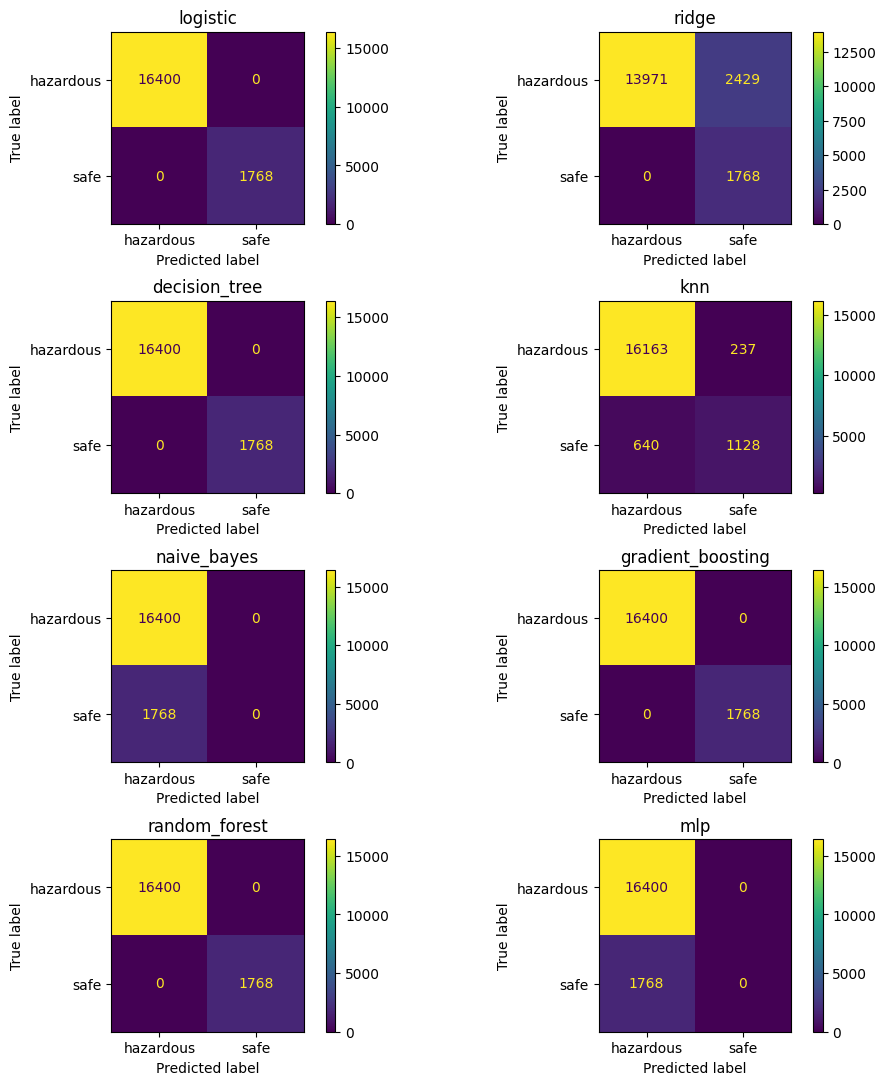

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["hazardous", "safe"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

16400 - количество истинных положительных диагнозов (True Positives), где модель правильно определила объекты как "hazardous".

1768 в некоторых моделях - количество ложных отрицательных диагнозов (False Negatives), где модель неправильно определила объекты, которые на самом деле принадлежат к классу "hazardous", но были отнесены к классу "safe". 

Исходя из значений True Positives и False Negatives, можно сказать, что модель имеет высокую точность при предсказании класса "hazardous". В принципе, уровень ложных отрицательных результатов в некоторых моделях (1768) говорит нам о том, что существует некотрое небольшое количество примеров, которые модель пропускает.

Точность, полнота, верность (аккуратность), F-мера

In [26]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Все модели в данной выборке, а именно логистическая регрессия, ридж-регрессия, дерево решений, KNN, наивный байесовский классификатор, градиентный бустинг, случайный лес и многослойный перцептрон (MLP) демонстрируют неплохие значения по всем метрикам на обучающих и тестовых наборах данных.

Модели Naive Bayes и MLP не так эффективны по сравнению с другими, но в некоторых метриках показывают высокие результаты. 
ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [27]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

Схожий вывод можно сделать и для следующих метрик: Accuracy, F1, ROC AUC, Cohen's Kappa и MCC. Все модели, кроме Naive Bayes и MLP, указывают на хорошо-развитую способность к выделению классов

In [28]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

#### Вывод данных с ошибкой предсказания для оценки

In [29]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["hazardous"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 0'

Empty DataFrame
Columns: [id, Predicted, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object, absolute_magnitude, hazardous]
Index: []

#### Пример использования обученной модели (конвейера) для предсказания


In [30]:
model = class_models[best_model]["pipeline"]

example_id = 67305
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

id        name est_diameter_min est_diameter_max  \
67305  3774018  (2017 HF1)         0.084053         0.187949   

      relative_velocity    miss_distance orbiting_body sentry_object  \
67305      53291.016226  68625911.198806         Earth         False   

      absolute_magnitude hazardous  
67305               22.5     False

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
67305         -0.140818         -0.140818           0.207258       1.410653   

       sentry_object  absolute_magnitude  hazardous         id  
67305            0.0           -0.353797  -0.328347  3774018.0

'predicted: False (proba: [9.99855425e-01 1.44575476e-04])'

'real: 0'

#### Подбор гиперпараметров методом поиска по сетке 

In [31]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__n_estimators': 50}

#### Обучение модели с новыми гиперпараметрами

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics
import pandas as pd


# Определяем числовые признаки
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Установка random_state
random_state = 42

# Определение трансформера
pipeline_end = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_features),
    # Добавьте другие трансформеры, если требуется
])

# Объявление модели
optimized_model = RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=5,
    max_features="sqrt",
    n_estimators=50,
)

# Создание пайплайна с корректными шагами
result = {}

# Обучение модели
result["pipeline"] = Pipeline([
    ("pipeline", pipeline_end),
    ("model", optimized_model)
]).fit(X_train, y_train.values.ravel())

# Прогнозирование и расчет метрик
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

# Метрики для оценки модели
result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [39]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [40]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

In [41]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

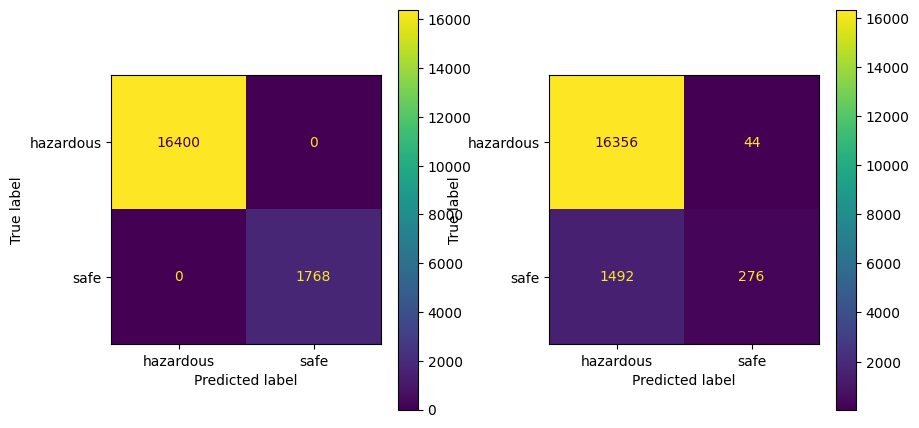

In [42]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["hazardous", "safe"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()

В желтых квадрате мы наблюдаем значение 16400, что обозначает количество правильно классифицированных объектов, отнесенных к классу "hazardsous". Это свидетельствует о том, что модель успешно идентифицирует объекты этого класса, минимизируя количество ложных положительных срабатываний.

В фиолетвом квадрате значение 276 указывает на количество правильно классифицированных объектов, отнесенных к классу "More". Это является показателем не такой высокой точности модели в определении объектов данного класса.

### Определение достижимого уровня качества модели для второй задачи (задача регрессии)

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config

random_state=42
set_config(transform_output="pandas")
df = pd.read_csv(".//static//csv//neo.csv")
# Удаление столбцов "sentry_object" и "hazardous"
df = df.drop(columns=["sentry_object", "hazardous", "orbiting_body", "name"])

# Ограничение количества записей до 5,000
df = df.sample(n=5000, random_state=random_state).reset_index(drop=True)

# Проверка итогового DataFrame
print(df.shape)  # Убедитесь, что размер 5,000 строк
df

(5000, 6)


id  est_diameter_min  est_diameter_max  relative_velocity  \
0      3943344          0.024241          0.054205       22148.962596   
1      3879239          0.012722          0.028447       26477.211836   
2      3879244          0.013322          0.029788       33770.201397   
3      2481965          0.193444          0.432554       43599.575296   
4      3789471          0.044112          0.098637       36398.080883   
...        ...               ...               ...                ...   
4995   3468663          0.006677          0.014929       20300.398051   
4996   3620670          0.105817          0.236614       36514.062162   
4997   3562321          0.192555          0.430566       68895.907750   
4998   3440771          0.253837          0.567597       61336.513568   
4999  54065901          0.015295          0.034201       18389.028188   

      miss_distance  absolute_magnitude  
0      5.028574e+07               25.20  
1      1.683201e+06               26.60  
2      3.943220e+06               26.50  
3      7.346837e+07               20.69  
4      6.352916e+07               23.90  
...             ...                 ...  
4995   1.700006e+06               28.00  
4996   6.945396e+07               22.00  
4997   5.209557e+07               20.70  
4998   5.037204e+07               20.10  
4999   5.627145e+07               26.20  

[5000 rows x 6 columns]

In [202]:
import pandas as pd

# Загрузка данных (замените путь на актуальный, если требуется)
df = pd.read_csv(".//static//csv//neo.csv")

# Убедитесь, что столбцы в данных содержат необходимые характеристики
required_columns = ["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance"]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Отсутствуют столбцы: {missing_columns}")

# Создание переменной "impact_damage_index"
# Формула, используемая ниже, условная и может быть скорректирована в зависимости от анализа
# Пример: чем больше средний диаметр и скорость, тем выше ущерб. Чем больше расстояние, тем ниже ущерб.
df["impact_damage_index"] = (
    (df["est_diameter_min"] + df["est_diameter_max"]) / 2  # Средний диаметр
    * df["relative_velocity"]  # Скорость
    / df["miss_distance"]  # Обратная зависимость от расстояния
)

# Проверка новых данных
print(df[["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "impact_damage_index"]].head())

   est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0          1.198271          2.679415       13569.249224   5.483974e+07   
1          0.265800          0.594347       73588.726663   6.143813e+07   
2          0.722030          1.614507      114258.692129   4.979872e+07   
3          0.096506          0.215794       24764.303138   2.543497e+07   
4          0.255009          0.570217       42737.733765   4.627557e+07   

   impact_damage_index  
0             0.000480  
1             0.000515  
2             0.002680  
3             0.000152  
4             0.000381  


#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи регрессии 

In [203]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_into_train_test(
    df_input: DataFrame,
    target_colname: str = "impact_damage_index",
    frac_train: float = 0.8,
    random_state: int = None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame]:
    
    if not (0 < frac_train < 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    # Проверка наличия целевого признака
    if target_colname not in df_input.columns:
        raise ValueError(f"{target_colname} is not a column in the DataFrame.")
    
    # Разделяем данные на признаки и целевую переменную
    X = df_input.drop(columns=[target_colname])  # Признаки
    y = df_input[[target_colname]]  # Целевая переменная

    # Удаляем указанные столбцы из X
    columns_to_remove = ["sentry_object", "hazardous", "orbiting_body", "name"]
    X = X.drop(columns=columns_to_remove, errors='ignore')  # Игнорировать ошибку, если столбцы не найдены

    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=(1.0 - frac_train),
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

# Применение функции для разделения данных
X_train, X_test, y_train, y_test = split_into_train_test(
    df, 
    target_colname="impact_damage_index", 
    frac_train=0.8, 
    random_state=42
)

# Для отображения результатов
display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)



'X_train'

id  est_diameter_min  est_diameter_max  relative_velocity  \
35538   3826685          0.038420          0.085909       91103.489666   
40393   2277830          0.192555          0.430566       28359.611312   
58540   3638201          0.004619          0.010329      107351.426865   
61670   3836282          0.015295          0.034201       21423.536884   
11435   3802002          0.011603          0.025944       69856.053840   
...         ...               ...               ...                ...   
6265    2530151          0.211132          0.472106       88209.754856   
54886   3831736          0.035039          0.078350       58758.452153   
76820   2512234          0.211132          0.472106       52355.509176   
860    54054466          0.282199          0.631015       50527.379563   
15795   3773929          0.075258          0.168283       22527.647871   

       miss_distance  absolute_magnitude  
35538   6.350550e+07               24.20  
40393   2.868167e+07               20.70  
58540   5.388098e+04               28.80  
61670   5.103884e+07               26.20  
11435   7.360836e+07               26.80  
...              ...                 ...  
6265    4.034289e+07               20.50  
54886   4.389994e+06               24.40  
76820   4.380532e+07               20.50  
860     5.837007e+07               19.87  
15795   2.281469e+07               22.74  

[72668 rows x 6 columns]

'y_train'

impact_damage_index
35538             0.000089
40393             0.000308
58540             0.014891
61670             0.000010
11435             0.000018
...                    ...
6265              0.000747
54886             0.000759
76820             0.000408
860               0.000395
15795             0.000120

[72668 rows x 1 columns]

'X_test'

id  est_diameter_min  est_diameter_max  relative_velocity  \
20406   3943344          0.024241          0.054205       22148.962596   
74443   3879239          0.012722          0.028447       26477.211836   
74306   3879244          0.013322          0.029788       33770.201397   
45943   2481965          0.193444          0.432554       43599.575296   
62859   3789471          0.044112          0.098637       36398.080883   
...         ...               ...               ...                ...   
51634   3694131          0.008801          0.019681       57414.305699   
85083  54235475          0.024920          0.055724       50882.935767   
38905   3775176          0.008405          0.018795       24954.754212   
16144   2434734          0.265800          0.594347       57455.404666   
54508   3170208          0.023150          0.051765       72602.093427   

       miss_distance  absolute_magnitude  
20406   5.028574e+07               25.20  
74443   1.683201e+06               26.60  
74306   3.943220e+06               26.50  
45943   7.346837e+07               20.69  
62859   6.352916e+07               23.90  
...              ...                 ...  
51634   1.987273e+07               27.40  
85083   3.119646e+07               25.14  
38905   1.111942e+07               27.50  
16144   8.501684e+06               20.00  
54508   4.624727e+07               25.30  

[18168 rows x 6 columns]

'y_test'

impact_damage_index
20406             0.000017
74443             0.000324
74306             0.000185
45943             0.000186
62859             0.000041
...                    ...
51634             0.000041
85083             0.000066
38905             0.000031
16144             0.002906
54508             0.000059

[18168 rows x 1 columns]

#### Определение перечня алгоритмов решения задачи аппроксимации (регрессии)

In [204]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, tree, neighbors, ensemble, neural_network

random_state = 9

models = {
    "linear": {"model": linear_model.LinearRegression(n_jobs=-1)},
    "linear_poly": {
        "model": make_pipeline(
            PolynomialFeatures(degree=2),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "linear_interact": {
        "model": make_pipeline(
            PolynomialFeatures(interaction_only=True),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "ridge": {"model": linear_model.RidgeCV()},
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)},
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=random_state, n_jobs=-1
        )
    },
    "mlp": {
        "model": neural_network.MLPRegressor(
            activation="tanh",
            hidden_layer_sizes=(3,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Формирование набора моделей для регрессии

In [205]:
import math
from pandas import DataFrame
from sklearn import metrics

for model_name in models.keys():
    print(f"Model: {model_name}")

    fitted_model = models[model_name]["model"].fit(
        X_train.values, y_train.values.ravel()
    )
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    models[model_name]["fitted"] = fitted_model
    models[model_name]["train_preds"] = y_train_pred
    models[model_name]["preds"] = y_test_pred
    models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(y_train, y_train_pred)
    )
    models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(y_test, y_test_pred)
    )
    models[model_name]["RMAE_test"] = math.sqrt(
        metrics.mean_absolute_error(y_test, y_test_pred)
    )
    models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_pred)

Model: linear
Model: linear_poly
Model: linear_interact
Model: ridge
Model: decision_tree
Model: knn
Model: random_forest
Model: mlp


Вывод результатов оценки

In [206]:
reg_metrics = pd.DataFrame.from_dict(models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])

Вывод реального и "спрогнозированного" результата для обучающей и тестовой выборок

Получение лучшей модели

In [207]:
best_model = str(reg_metrics.sort_values(by="RMSE_test").iloc[0].name)

display(best_model)

'random_forest'

Подбор гиперпараметров методом поиска по сетке

In [209]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # Используем регрессор
from sklearn.preprocessing import StandardScaler


df.dropna(inplace=True) 
# Предикторы и целевая переменная
X = df[["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"]]
y = df['impact_damage_index']  # Целевая переменная для регрессии


model = RandomForestRegressor() 

param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [10, 20],  
    'min_samples_split': [5, 10]  
}

# 3. Подбор гиперпараметров с помощью Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
grid_search.fit(X_train, y_train)

# 4. Результаты подбора гиперпараметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", -grid_search.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Лучший результат (MSE): 5.418559949534169e-07


Обучение модели с новыми гиперпараметрами и сравнение новых и старых данных

In [210]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt


old_param_grid = {
    'n_estimators': [50, 100],  # Количество деревьев
    'max_depth': [ 10, 20],  # Максимальная глубина дерева
    'min_samples_split': [5, 10]   # Минимальное количество образцов для разбиения узла
}

old_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=old_param_grid,
                                scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

old_grid_search.fit(X_train, y_train)

old_best_params = old_grid_search.best_params_
old_best_mse = -old_grid_search.best_score_  # Меняем знак, так как берем отрицательное значение MSE

new_param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [10]
}

new_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=new_param_grid,
                                scoring='neg_mean_squared_error', cv=2)

new_grid_search.fit(X_train, y_train)

new_best_params = new_grid_search.best_params_
new_best_mse = -new_grid_search.best_score_  # Меняем знак, так как берем отрицательное значение MSE

model_best = RandomForestRegressor(**new_best_params)
model_best.fit(X_train, y_train)

model_oldbest = RandomForestRegressor(**old_best_params)
model_oldbest.fit(X_train, y_train)

y_pred = model_best.predict(X_test)
y_oldpred = model_oldbest.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Старые параметры:", old_best_params)
print("Лучший результат (MSE) на старых параметрах:", old_best_mse)
print("\nНовые параметры:", new_best_params)
print("Лучший результат (MSE) на новых параметрах:", new_best_mse)
print("Среднеквадратическая ошибка (MSE) на тестовых данных:", mse)
print("Корень среднеквадратичной ошибки (RMSE) на тестовых данных:", rmse)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklea

Старые параметры: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Лучший результат (MSE) на старых параметрах: 5.299415148966497e-07

Новые параметры: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Лучший результат (MSE) на новых параметрах: 5.355742455463778e-07
Среднеквадратическая ошибка (MSE) на тестовых данных: 4.772832137780905e-07
Корень среднеквадратичной ошибки (RMSE) на тестовых данных: 0.0006908568692414446


Попробуем визуализировать

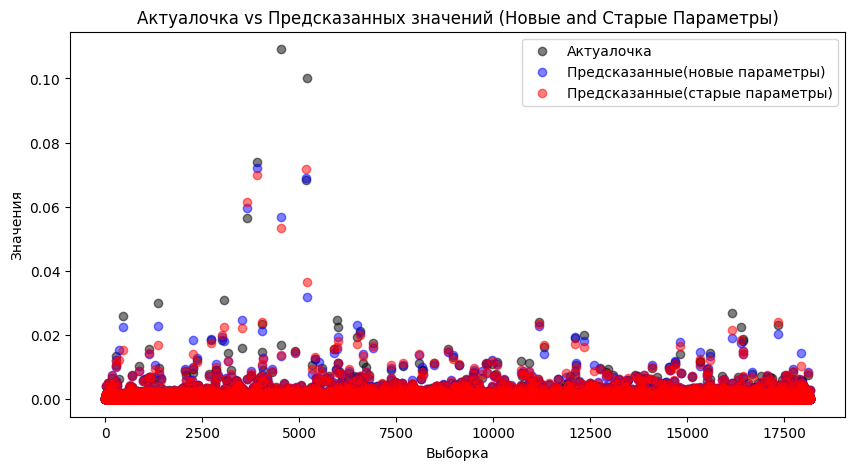

In [212]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="Актуалочка", color="black", alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label="Предсказанные(новые параметры)", color="blue", alpha=0.5)
plt.scatter(range(len(y_test)), y_oldpred, label="Предсказанные(старые параметры)", color="red", alpha=0.5)
plt.xlabel("Выборка")
plt.ylabel("Значения")
plt.legend()
plt.title("Актуалочка vs Предсказанных значений (Новые and Старые Параметры)")
plt.show()